In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Breif about Data : Data is about Human resources in a specific company each record represents an employee. The source of Dataset:https://www.kaggle.com/jacksonchou/hr-data-for-analytics

Variables description: 1) satisfaction_level : means how much employee satisfied (0 less satisfied , 1 most satisfied), 2) last_evaluation : means employees' evaluation for last month (0 bad , 1 Excellent), 3) number_project : number of projects the employee worked on , 4) average_montly_hours : average months employee spends at work per month , 5) time_spend_company : years the employee spent in a company , 6) Work_accident : 0 if he did not have an accident , 1 if had at least one , 7)left:0 if employee did not leave,1 if left company, 8)promotion_last_5years : 0 if he did not have any promotion in last 5 years,1 if had at least ones, 9)sales : department in which employee works, 10)salary: Salary

## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the dataset

In [3]:
df=pd.read_csv(r"/content/gdrive/My Drive/HR dataset/HR_comma_sep (1).csv")

In [4]:
display(pd.DataFrame(df))

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
df=df.rename(columns={'sales': 'department'})

In [6]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Basic understanding of data and EDA

In [7]:
df.shape

(14999, 10)

The dataset contains 14999 rows and 10 columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [9]:
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [10]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There is no missing values in the data

In [11]:
import plotly.express as px
import warnings
import time
from tabulate import tabulate

%matplotlib inline
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set_palette('rainbow')

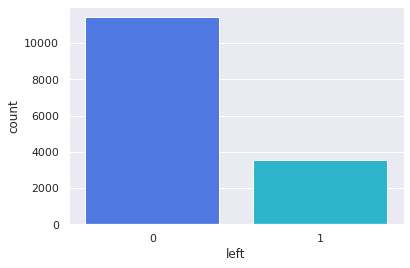

In [12]:
df['left'].value_counts()
sns.countplot(df.left)

In [13]:
from tabulate import tabulate
temp=[]
for i in df.columns:
    temp.append([i,df[i].unique().size])
print(tabulate(temp,headers=['Feature','Unique Values']))
temp = np.nan

Feature                  Unique Values
---------------------  ---------------
satisfaction_level                  92
last_evaluation                     65
number_project                       6
average_montly_hours               215
time_spend_company                   8
Work_accident                        2
left                                 2
promotion_last_5years                2
department                          10
salary                               3


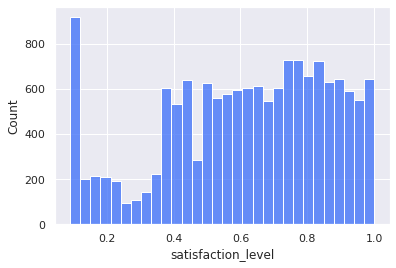

In [15]:
sns.histplot(x=df['satisfaction_level'])

In [16]:
df['satisfaction_level'].describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

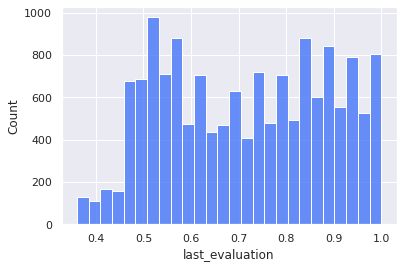

In [17]:
sns.histplot(x=df['last_evaluation'])

In [18]:
df['last_evaluation'].describe()

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64

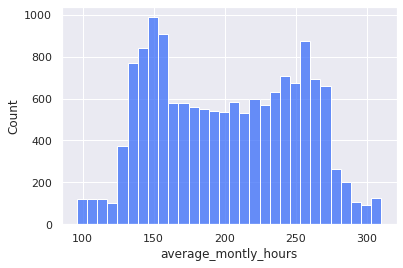

In [22]:
sns.histplot(x=df['average_montly_hours'])

In [23]:
df['average_montly_hours'].describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64

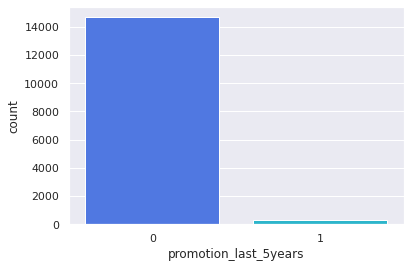

In [24]:
sns.countplot(x=df['promotion_last_5years'])

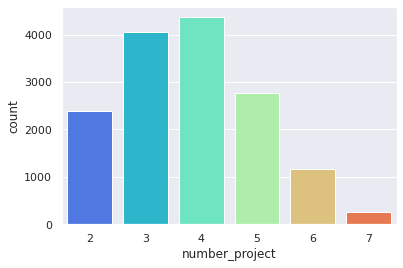

In [25]:
sns.countplot(x=df['number_project'])

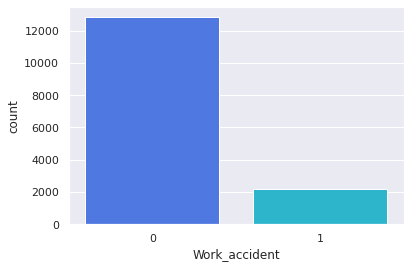

In [26]:
sns.countplot(x=df['Work_accident'])

salary distribution

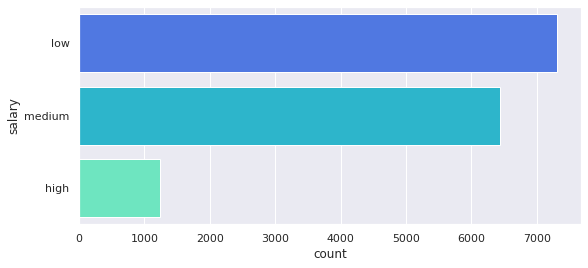

In [27]:
plt.figure(figsize=(9,4))
sns.countplot(y=df['salary'],orient='v')

Deapartment distribution

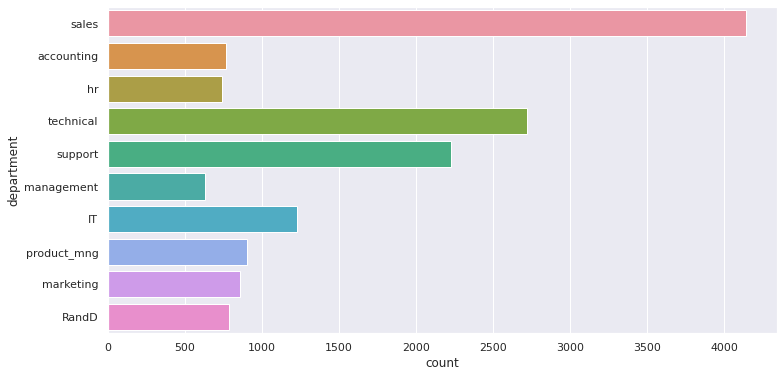

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(y=df['department'],orient='v')

Salary Visualisation

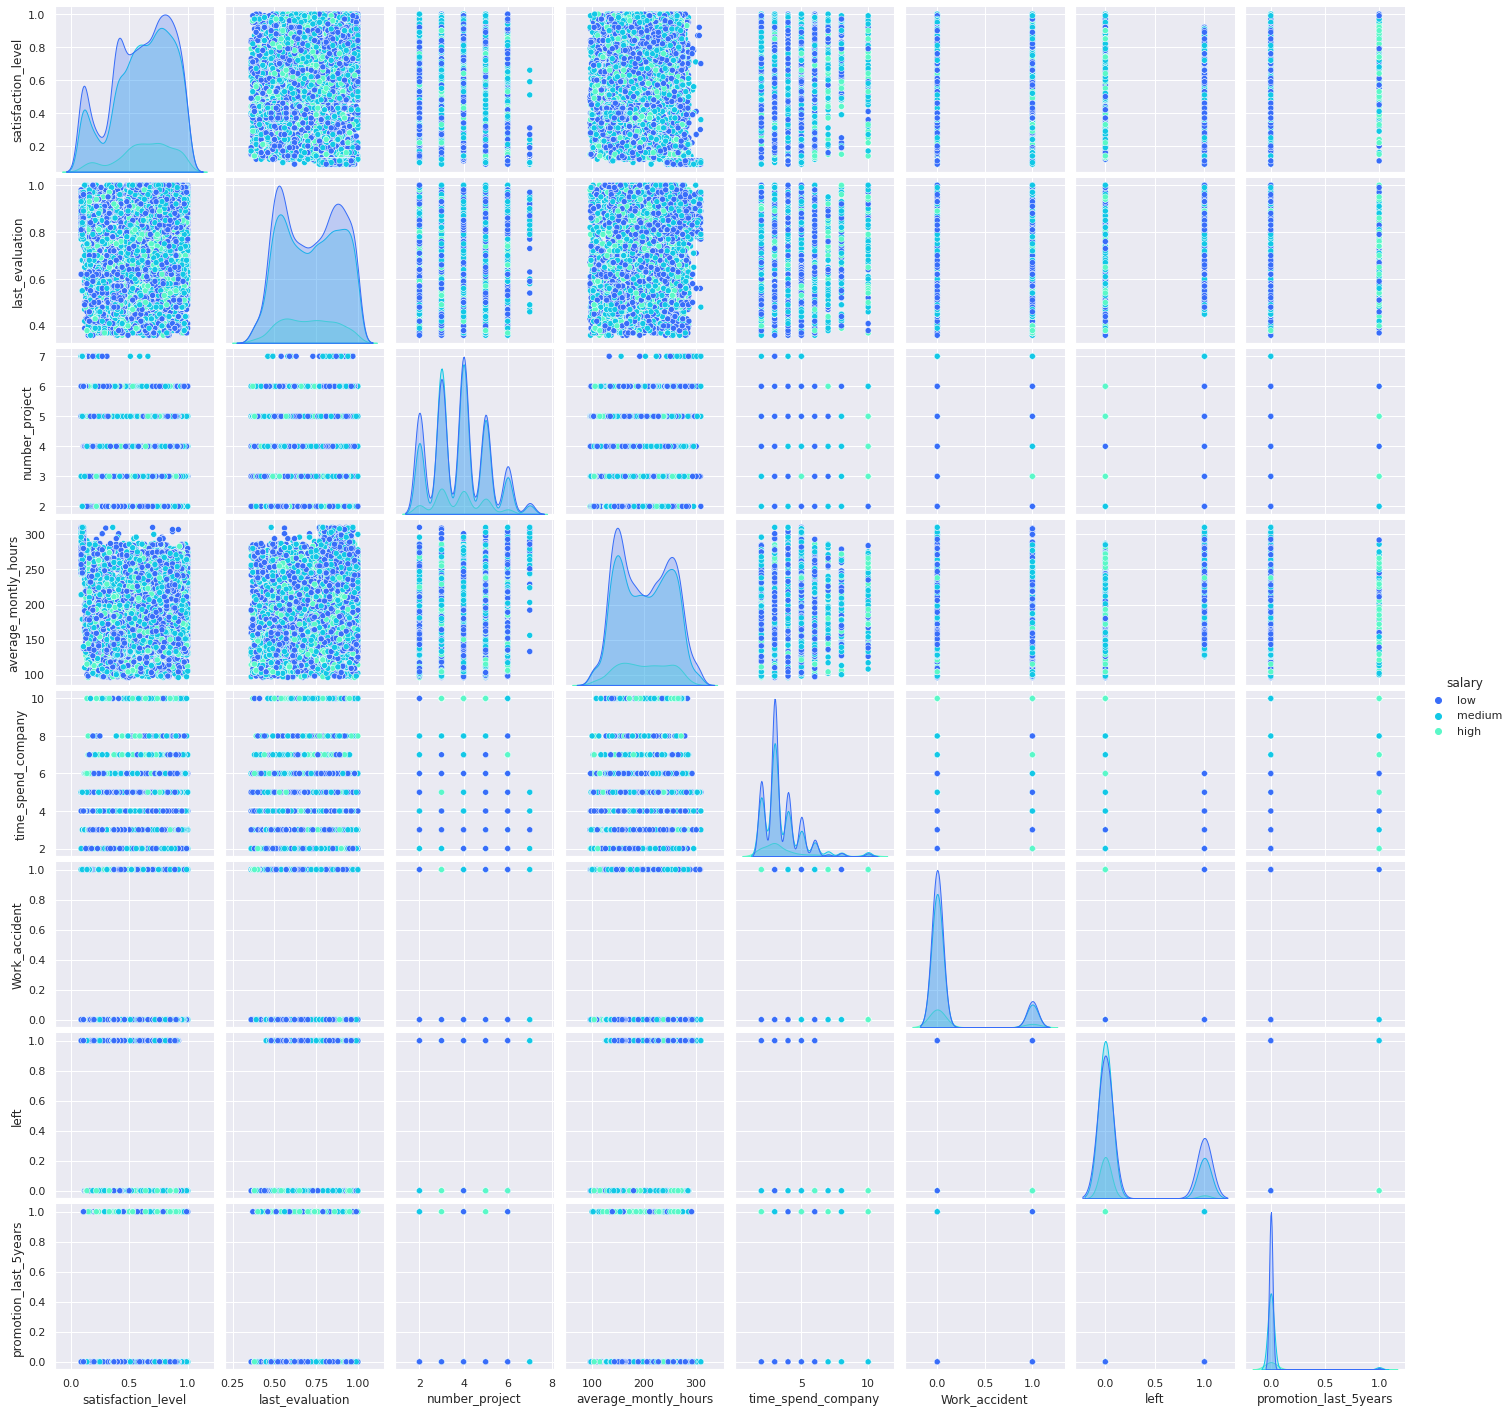

In [29]:
sns.pairplot(df,hue='salary')

Last Evaluation vs People Left

In [30]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

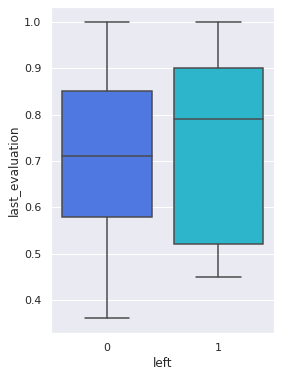

In [31]:
plt.figure(figsize=(4,6))
sns.boxplot(data=df,y='last_evaluation',x='left')


Monthly hours vs People Leaving

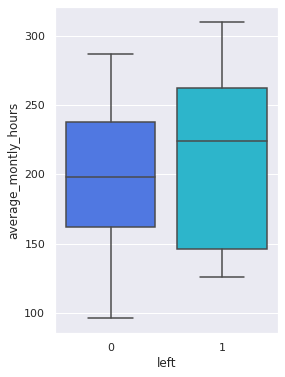

In [32]:
plt.figure(figsize=(4,6))
sns.boxplot(data=df,y='average_montly_hours',x='left')

Time spent at company vs people leaving

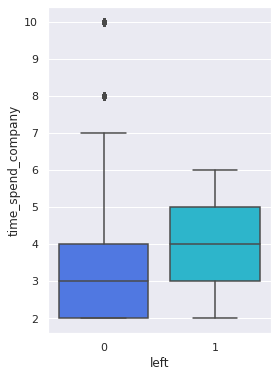

In [33]:
plt.figure(figsize=(4,6))
sns.boxplot(data=df,y='time_spend_company',x='left')

Satisfaction level vs. People Leaving

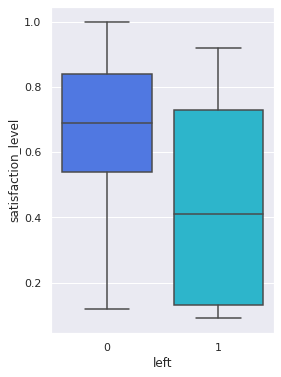

In [34]:
plt.figure(figsize=(4,6))
sns.boxplot(data=df,y='satisfaction_level',x='left')

Salary vs People Leaving

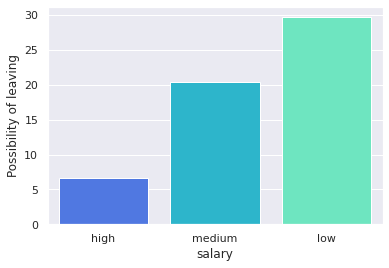

In [35]:
sns.barplot(data = pd.DataFrame(df.groupby('salary').mean()['left']*100).reset_index().sort_values(by='left').rename({'left':'Possibility of leaving'},axis=1),
           x='salary',
           y='Possibility of leaving')

Department wise people left vs Salary

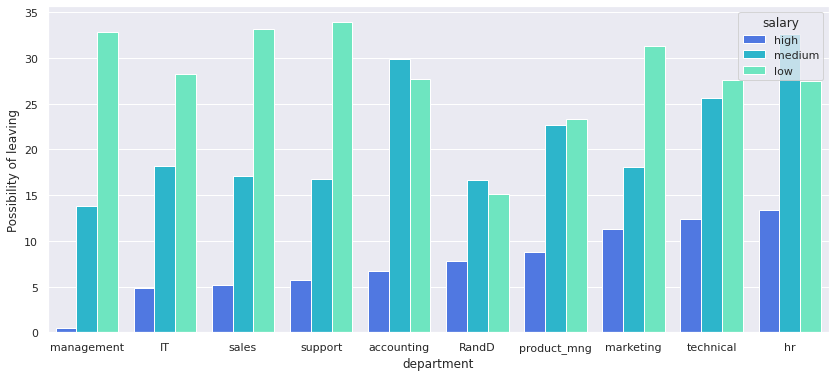

In [36]:
plt.figure(figsize=(14,6))
sns.barplot(data = pd.DataFrame(df.groupby(['department','salary']).mean()['left']*100).reset_index().sort_values(by='left').rename({'left':'Possibility of leaving'},axis=1),
           x='department',
           y='Possibility of leaving',
           hue='salary')

Promotion vs People leaving vs Salary

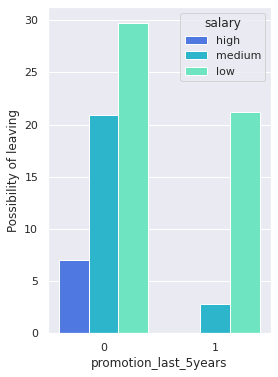

In [37]:
plt.figure(figsize=(4,6))
sns.barplot(data = pd.DataFrame(df.groupby(['promotion_last_5years','salary']).mean()['left']*100).reset_index().sort_values(by='left').rename({'left':'Possibility of leaving'},axis=1),
           x='promotion_last_5years',
           y='Possibility of leaving',
           hue='salary')

# Pre-Processing

In [38]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There is no missing values

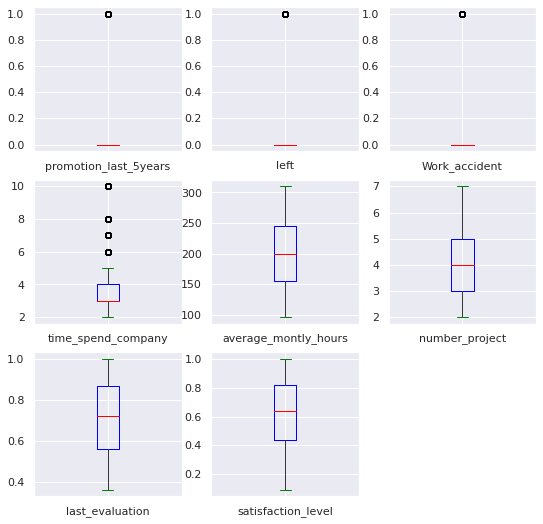

In [39]:
plt.figure(figsize=(9, 9)) 
plt.subplot(3, 3, 1)
df.boxplot(column=['promotion_last_5years'], color=dict(boxes='b', medians='r', caps='g'))
plt.subplot(3, 3, 2, )
df.boxplot(column=['left'], color=dict(boxes='b', medians='r', caps='g'))
plt.subplot(3, 3, 3, )
df.boxplot(column=['Work_accident'], color=dict(boxes='b', medians='r', caps='g'))
plt.subplot(3, 3, 4, )
df.boxplot(column=['time_spend_company'], color=dict(boxes='b', medians='r', caps='g'))
plt.subplot(3, 3, 5, )
df.boxplot(column=['average_montly_hours'], color=dict(boxes='b', medians='r', caps='g'))
plt.subplot(3, 3, 6)
df.boxplot(column=['number_project'], color=dict(boxes='b', medians='r', caps='g'))
plt.subplot(3, 3, 7, )
df.boxplot(column=['last_evaluation'], color=dict(boxes='b', medians='r', caps='g'))
plt.subplot(3, 3, 8, )
df.boxplot(column=['satisfaction_level'], color=dict(boxes='b', medians='r', caps='g'))
plt.show()

Here we can see there is some starnge outliers in first three coulmn, let's check their value 

In [40]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [41]:
df['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [42]:
df['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

As we see with value_counts , these datas are not outliers, but they are real data in their feature . In fact, it has a large data ratio, so the box diagram shows them as outlier data.

## Feature Reduction

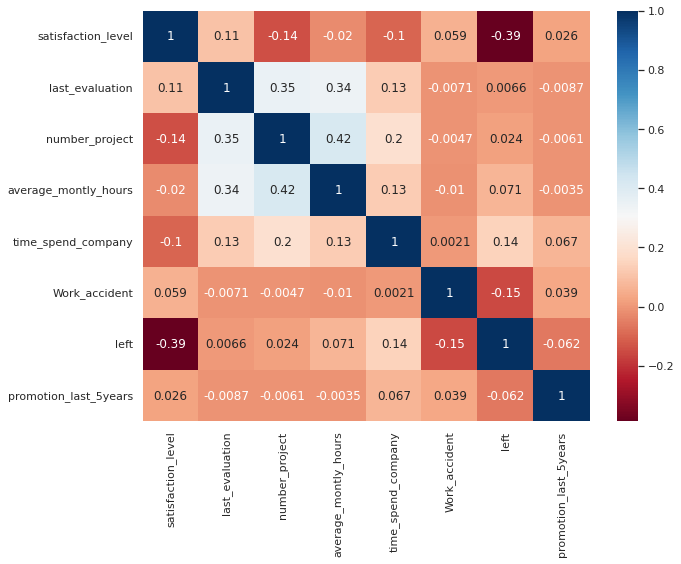

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='RdBu', annot=True)
plt.tight_layout()

In [44]:
df = df.drop(columns=['last_evaluation'])  # cause of low corrolation

# Encoding

Here we using ordinal encoding for salary and one-hot encoding for department.

In [46]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['salary']=le.fit_transform(df['salary'])
df.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,2,157,3,0,1,0,sales,1
1,0.80,5,262,6,0,1,0,sales,2
2,0.11,7,272,4,0,1,0,sales,2
3,0.72,5,223,5,0,1,0,sales,1
4,0.37,2,159,3,0,1,0,sales,1


In [47]:
df=pd.get_dummies(df,drop_first=True )
df.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0


In [48]:
df.columns

Index(['satisfaction_level', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years',
       'salary', 'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical'],
      dtype='object')

In [49]:
df.shape

(14999, 17)

# Model Building

In [56]:
X=df.drop(columns=['salary'],axis=1)
y=df['salary']

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(11999, 16)
(3000, 16)


In [65]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [67]:
Algorithms = [LinearRegression(),  Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor()]
names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor']

In [68]:
r2scorelist=[]

In [70]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
for name in Algorithms:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2= r2_score(y_test,y_pred)
    r2scorelist.append(r2)

In [71]:
evaluation = pd.DataFrame({'Model': names,
                           'R2score': r2scorelist})
evaluation

,Model,R2score
0,Linear Regression,0.006593
1,Ridge Regression,0.006629
2,Lasso Regression,-0.000211
3,K Neighbors Regressor,-0.134668
4,Decision Tree Regressor,-0.491443


In [72]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squarred error: ',mean_squared_error(y_test,pred))
print(' Root mean squarred error: ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2 Score: ',r2_score(y_test,pred))

Mean absolute error:  0.46254649364524364
Mean squarred error:  0.3369350774598288
 Root mean squarred error:  0.580461090392654
R2 Score:  0.14280424662526603


In [73]:
#sklearn.ensemble.GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squarred error: ',mean_squared_error(y_test,pred))
print(' Root mean squarred error: ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2 Score: ',r2_score(y_test,pred))

Mean absolute error:  0.5555522483841028
Mean squarred error:  0.3838149139677371
 Root mean squarred error:  0.6195279767433728
R2 Score:  0.023537362700804643


Here Random forest regression is best fit

# Fine Tuning for Hyper parameter

In [74]:
rf.fit(X_train,y_train)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [75]:
rft=RandomForestRegressor(n_estimators=500,max_depth=1000,random_state=42)
rft.fit(X_train,y_train)

RandomForestRegressor(max_depth=1000, n_estimators=500, random_state=42)

In [77]:
rft.fit(X_train,y_train)
pred=rft.predict(X_test)
print(r2_score(y_test,pred))

0.14923102623571527
